## Importações:

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from itertools import combinations
from scipy.optimize import curve_fit
#from scipy.interpolate import interp1d
plt.style.use('seaborn-bright')
import pandas as pd

In [2]:
from funcoes import Particula, mudar_passo, gerar_particulas, simular_reacao

## Parâmetros da simulação:

In [3]:
#Parâmetros da simulação:

numero_particulas = 100
tamanho_caixa = 50
RAIO = 0.5
MASSA = 1
probabilidade_reacao = 0.7
tipo = 'atomo'

tempo_final = 50
numero_passos = 400
tempo_cada_passo = tempo_final/numero_passos

## Simulação da reação química:

- Se ocorre uma reação ela é necessariamente 
- Tem conservação de massa?
- Eu preciso que em algum lugar seja definido o tipo das partículas para eu conseguir fazer um if 
- talvez transformar nossa partícula em uma matriz igual do amauri e tirar o resto das classes
- precisa atualizar a matriz de partículas 
- verificar se há colisão
- Testar se é melhor fazer uma nova classe 'molécula' ou usar 'nova_particula = Particula(nova_massa, novo_raio, nova_posicao, nova_velocidade, tipo)
- Checar se a conservação de volume está no livro
- Tirar uma das partículas e gerar uma nova a partir da outra
- Usar o itertools (tem uma função que não repete) para usar o particula1 com particula2
- itertools.combinations

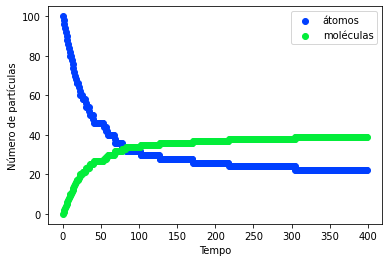

In [4]:
lista_particulas = gerar_particulas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)

lista_atomos, lista_moleculas = [], []

# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
     # Simular colisões
    simular_reacao(lista_particulas, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_atomos.append(a_count)
    lista_moleculas.append(m_count)

plt.scatter(list(range(numero_passos)),lista_atomos,label='átomos')
plt.scatter(list(range(numero_passos)),lista_moleculas,label='moléculas')
plt.xlabel('Tempo')
plt.ylabel('Número de partículas')
plt.savefig('semajuste.png')
plt.legend()
plt.show()

## Gerar animação da reação:

C:\Users\DANIEL~1\AppData\Local\Temp/ipykernel_24008/751259133.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), RAIO, fill=True, color='blue', edgecolor='black')


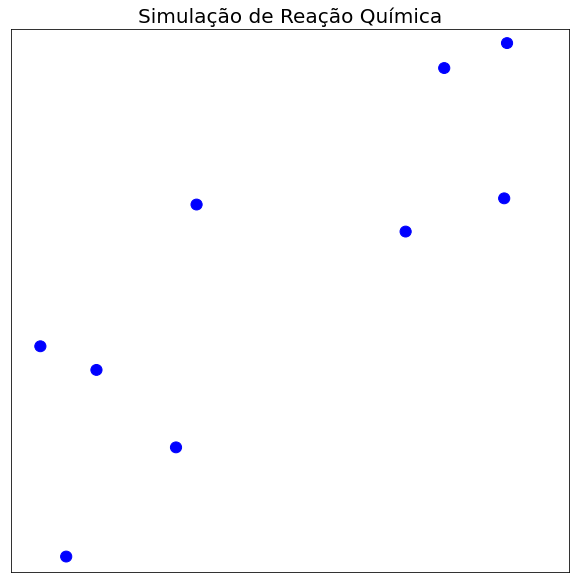

In [5]:
lista_atomos2, lista_moleculas2 = [], []

def criar_animacao_simulacao_reacao(lista_particulas, tamanho_caixa, RAIO, NUM_STEPS, probabilidade_reacao):
    fig, ax = plt.subplots(figsize=(10, 10))
    ims = []

    ax.set_xlim(0, tamanho_caixa)
    ax.set_ylim(0, tamanho_caixa)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Simulação de Reação Química', fontsize=20)
     
    for k in range(NUM_STEPS):
        # Chamando a função para simular reações
        simular_reacao(lista_particulas, probabilidade_reacao)

        # Desenha as partículas após a simulação de reação
        circles = []
        a_count, m_count = 0, 0
        
        for particula in lista_particulas:
            if k < len(particula.todas_posicoes):
                x = particula.todas_posicoes[k][0]
                y = particula.todas_posicoes[k][1]
                circle = plt.Circle((x, y), RAIO, fill=True, color='blue', edgecolor='black')
                ax.add_artist(circle)
                circles.append(circle)
            
            if particula.tipo == 'atomo':
                a_count += 1
            else:
                m_count += 1
        
        lista_atomos2.append(a_count)
        lista_moleculas2.append(m_count)
        
        ims.append(circles)

    ani = animation.ArtistAnimation(fig, ims, interval=40, blit=True, repeat_delay=100)
    writer = animation.PillowWriter(fps=10, bitrate=4000)
    ani.save("resultados/simulacao_reacao.gif", writer=writer, dpi=100)

criar_animacao_simulacao_reacao(lista_particulas, tamanho_caixa, RAIO, numero_passos, probabilidade_reacao)

## Criando DataFrame para trabalhar com os dados:

In [6]:
lista = {'Atomos': lista_atomos, 'Moléculas': lista_moleculas, 'tempo': range(numero_passos)}

print(len(lista_atomos))
print(len(lista_moleculas))
print(len(range(numero_passos)))


df = pd.DataFrame(lista)

atomodf = df['Atomos'] #df.iloc[0 : 70, 0]
temporeagente = df['tempo'] #df.iloc[0:70, 2]

produtodf = df.iloc[1 : 400, 1]
tempoproduto = df.iloc[1 : 400, 2]



400
400
400


## Fitagem com função exponencial:

O valor de k é: 0.02425246954766269


c:\venv\ilumpy\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


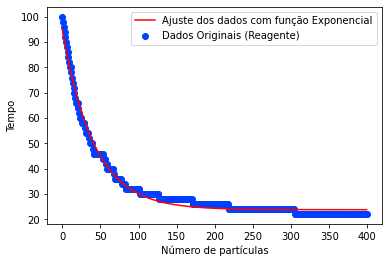

In [7]:
def exponencial(t, a, k, c):
    return a * np.exp(-k * t) + c

popt, _ = curve_fit(exponencial, temporeagente, atomodf)
valores_fit_reagente = exponencial(temporeagente, *popt)

k = popt[1]
print("O valor de k é:", k)

plt.scatter(temporeagente, atomodf , label='Dados Originais (Reagente)')
plt.plot(temporeagente, valores_fit_reagente, label='Ajuste dos dados com função Exponencial', color='red')
plt.savefig('nome_do_arquivo.png')
plt.xlabel('Número de partículas')
plt.ylabel('Tempo')
plt.legend()
plt.show()

## Fitagem com função logarítmica:

O valor de k é: 24.130269141093844


c:\venv\ilumpy\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


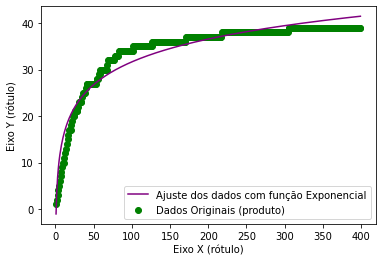

In [8]:
def logaritimica(x, a, b, c):
    return a * np.log(b * x) + c

popt, _ = curve_fit(logaritimica, tempoproduto, produtodf)
valores_fit_produto = logaritimica(tempoproduto, *popt)

b = popt[1]
print("O valor de k é:", b)

plt.scatter(tempoproduto, produtodf , label='Dados Originais (produto)', color='green')
plt.plot(tempoproduto, valores_fit_produto, label='Ajuste dos dados com função Exponencial', color='purple')
plt.xlabel('Eixo X (rótulo)')
plt.ylabel('Eixo Y (rótulo)')
plt.legend()
plt.show()

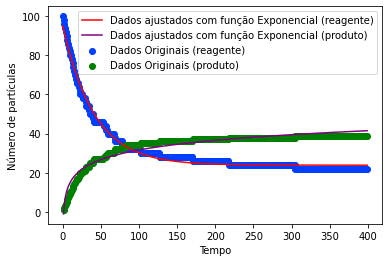

In [9]:
plt.scatter(temporeagente, atomodf , label='Dados Originais (reagente)')
plt.plot(temporeagente, valores_fit_reagente, label='Dados ajustados com função Exponencial (reagente)', color='red')
plt.scatter(tempoproduto, produtodf , label='Dados Originais (produto)', color='green')
plt.plot(tempoproduto, valores_fit_produto, label='Dados ajustados com função Exponencial (produto)', color='purple')
plt.xlabel('Tempo')
plt.ylabel('Número de partículas')
plt.legend()
plt.savefig('dadosajustadaos.png')
plt.show()


## Análise do Método da Velocidade Inicial:

In [10]:
# Vlor de K pela quantidade de partículas iniciais
# Initial rate method

C:\Users\DANIEL~1\AppData\Local\Temp/ipykernel_24008/3747738116.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-k * t) + c


Para N = 20, os parâmetros ajustados são: k=0.002111863026734151
Para N = 60, os parâmetros ajustados são: k=0.022546007097870743
Para N = 100, os parâmetros ajustados são: k=0.029277671413496797


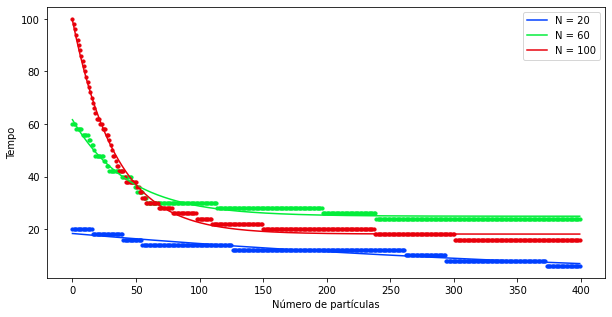

In [11]:
numero_particulas = [20, 60, 100] #, 140, 180, 200]

parametros_ajustados = []
valores_ajustados = []
valores_iniciais = []

for num_particulas in numero_particulas:
    lista_particulas = gerar_particulas(num_particulas, RAIO, MASSA, tamanho_caixa, tipo)
    lista_atomos =  []

    # Compute simulation
    for i in range(numero_passos):
        # Simular colisões
        simular_reacao(lista_particulas, probabilidade_reacao)

        # Atualizar posições e velocidades
        mudar_passo(lista_particulas, tempo_cada_passo, tamanho_caixa)

        a_count, m_count = 0, 0

        for particula in lista_particulas:
            if particula.tipo == 'atomo':
                a_count += 1

        lista_atomos.append(a_count)
       
    temporeagente = range(numero_passos)  
    atomodf = lista_atomos  
    valores_iniciais.append(atomodf)
    
    popt, _ = curve_fit(exponencial, temporeagente, atomodf)
    parametros_ajustados.append(popt)
    valores_fit_reagente = exponencial(temporeagente, *popt)
    valores_ajustados.append(valores_fit_reagente)


for i, popt in enumerate(parametros_ajustados):
    print(f"Para N = {numero_particulas[i]}, os parâmetros ajustados são: k={popt[1]}")


plt.figure(figsize=(10, 5))
for i, num_particulas in enumerate(numero_particulas):
    plt.plot(temporeagente, valores_ajustados[i], label=f'N = {num_particulas}')
    
for dados in valores_iniciais:
    plt.scatter(temporeagente, dados, s=10)

plt.xlabel('Número de partículas')
plt.ylabel('Tempo')
plt.legend()
plt.savefig('concentracaoinicial.png')
plt.show()

## Mudar a probabilidade:

In [12]:
# Definir as probabilidades de reação a serem testadas
probabilidades_reacao = [0.1, 0.3, 0.5, 0.7, 0.9]

parametros_ajustados = []
valores_ajustados = []
valores_iniciais = []

for probabilidade_reacao in probabilidades_reacao:
    lista_particulas = gerar_particulas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)
    lista_atomos =  []

    # Compute simulation
    for i in range(numero_passos):
        # Simular colisões
        simular_reacao(lista_particulas, probabilidade_reacao)

        # Atualizar posições e velocidades
        mudar_passo(lista_particulas, tempo_cada_passo, tamanho_caixa)

        a_count, m_count = 0, 0

        for particula in lista_particulas:
            if particula.tipo == 'atomo':
                a_count += 1

        lista_atomos.append(a_count)

    temporeagente = range(numero_passos)
    atomodf = lista_atomos
    valores_iniciais.append(atomodf)

    popt, _ = curve_fit(exponencial, temporeagente, atomodf)
    parametros_ajustados.append(popt)
    valores_fit_reagente = exponencial(temporeagente, *popt)
    valores_ajustados.append(valores_fit_reagente)

for i, popt in enumerate(parametros_ajustados):
    print(f"Para probabilidade_reacao = {probabilidades_reacao[i]}, o parâmetro ajustado k={popt[0]}")

plt.figure(figsize=(10, 5))
for i, probabilidade_reacao in enumerate(probabilidades_reacao):
    plt.plot(temporeagente, valores_ajustados[i], label=f'Prob. Reação = {probabilidade_reacao}')

for dados in valores_iniciais:
    plt.scatter(temporeagente, dados, s=10)

plt.xlabel('Número de partículas')
plt.ylabel('Tempo')
plt.legend()
plt.savefig('concentracaoinicial.png')
plt.show()


TypeError: 'list' object cannot be interpreted as an integer